In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
X=np.array([[0,1,0,1],
           [1,0,1,1],
           [0,0,0,1],
            [1,0,1,0]])
y=np.array([0,1,0,1])

In [3]:
counts={}
for label in np.unique(y):
    print(label)
    counts[label] = X[y==label].sum(axis=0)
print('Feature counts:\n{}'.format(counts))

0
1
Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                              stratify=cancer.target,
                                              random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [5]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)

print('Accuracy of training set: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy of test set: {:.3f}'.format(tree.score(X_test,y_test)))

Accuracy of training set: 0.988
Accuracy of test set: 0.951


In [6]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['malignant','benign'],
               feature_names=cancer.feature_names,impurity=False,filled=True)

In [7]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

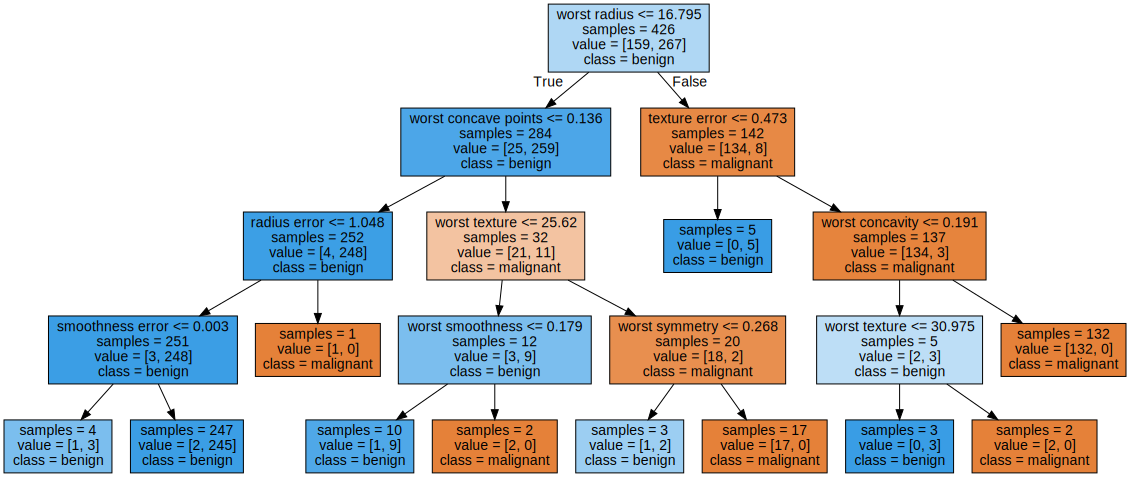

In [9]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
print('Feature importances:\n{}'.format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


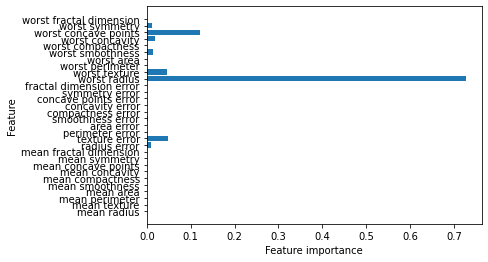

In [13]:
def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


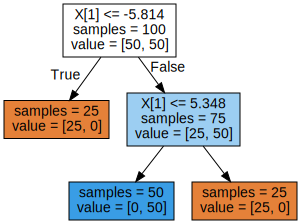

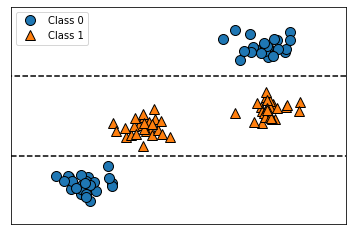

In [25]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

In [26]:
ram_prices = pd.read_csv("C:/Users/cod/Desktop/ram_price.csv")

In [27]:
ram_prices.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


Text(0, 0.5, 'Price in $/Mbyte')

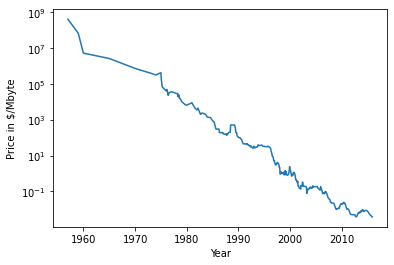

In [29]:
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

In [34]:
from sklearn.tree import DecisionTreeRegressor
data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices.date>=2000]

In [31]:
X_train=data_train.date[:,np.newaxis]
y_train=np.log(data_train.price)

tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

X_all=ram_prices.date[:,np.newaxis]
pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

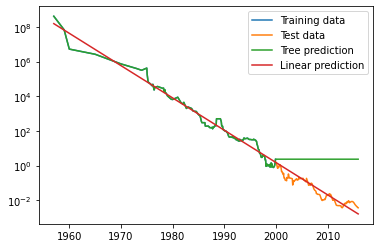

In [32]:
plt.semilogy(data_train.date,data_train.price)
plt.semilogy(data_test.date,data_test.price)
plt.semilogy(ram_prices.date,price_tree)
plt.semilogy(ram_prices.date,price_lr)
plt.legend(['Training data','Test data','Tree prediction','Linear prediction'])
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)
forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

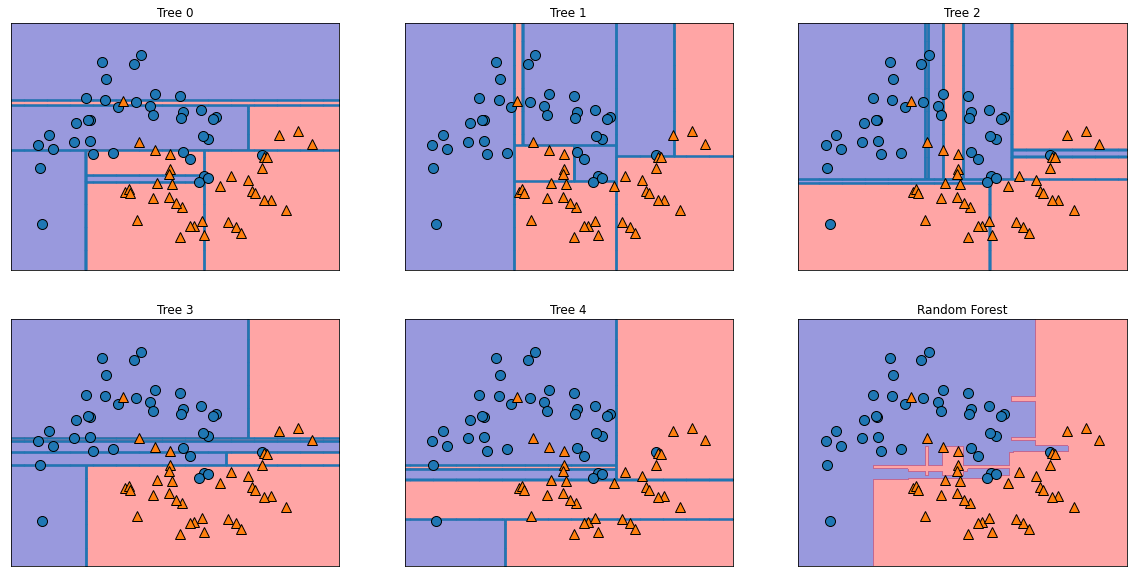

In [45]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [47]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                               random_state=0)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print('Accuracy on training set :{:.3f}'.format(forest.score(X_train,y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test,y_test)))

Accuracy on training set :1.000
Accuracy on test set: 0.972


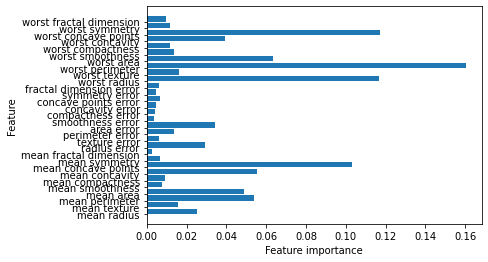

In [48]:
plot_feature_importances_cancer(forest)